In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21 raw data v2.csv
/kaggle/input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21_raw_data.csv


In [2]:
data = pd.read_csv("/kaggle/input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21 raw data v2.csv")
data.head()

/tmp/ipykernel_21/1717771531.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/kaggle/input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21 raw data v2.csv")


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [3]:
data.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

To decide my atrributes from the dataset i am using my football knowledge to pick criterias that directly affect or rather determin a players stats

In [4]:
df = pd.DataFrame(columns=['Name', 'Nationality', 'Age', 'Club', 'Position', 'Value', 'Wage'])
df['Name'] = data.iloc[:, 1]  
df['Nationality'] = data.iloc[:, 5]
df['Age'] = data.iloc[:, 6]
df['Club'] = data.iloc[:, 9]
df['Position'] = data.iloc[:, 16]
df['Value'] = data.iloc[:, 19]
df['Wage'] = data.iloc[:, 20]
df['Rating Level'] = data.iloc[:, 7]
df

,Name,Nationality,Age,Club,Position,Value,Wage,Rating Level
0,L. Messi,Argentina,33,\n\n\n\nFC Barcelona,RW,€103.5M,€560K,93
1,Cristiano Ronaldo,Portugal,35,\n\n\n\nJuventus,ST,€63M,€220K,92
2,J. Oblak,Slovenia,27,\n\n\n\nAtlético Madrid,GK,€120M,€125K,91
3,K. De Bruyne,Belgium,29,\n\n\n\nManchester City,CAM,€129M,€370K,91
4,Neymar Jr,Brazil,28,\n\n\n\nParis Saint-Germain,LW,€132M,€270K,91
...,...,...,...,...,...,...,...,...
18974,Xia Ao,China PR,21,\n\n\n\nWuhan Zall,CB,€100K,€1K,47
18975,B. Hough,England,17,\n\n\n\nOldham Athletic,CAM,€130K,€500,47
18976,R. McKinley,England,18,\n\n\n\nDerry City,CAM,€120K,€500,47
18977,Wang Zhen'ao,China PR,20,\n\n\n\nDalian YiFang FC,ST,€100K,€2K,47


Cleaning the dataset where i need to

In [5]:
df['Nationality'].unique()

array(['Argentina', 'Portugal', 'Slovenia', 'Belgium', 'Brazil', 'Poland',
       'Egypt', 'France', 'Germany', 'Netherlands', 'Senegal', 'Spain',
       'England', 'Scotland', 'Korea Republic', 'Costa Rica', 'Italy',
       'Gabon', 'Croatia', 'Uruguay', 'Switzerland', 'Serbia', 'Slovakia',
       'Morocco', 'Algeria', 'Denmark', 'Hungary', 'Bosnia Herzegovina',
       'Nigeria', 'Cameroon', 'Norway', 'Ghana', 'Mexico', 'Austria',
       'Albania', 'Colombia', 'Chile', 'Ivory Coast', 'Greece', 'Finland',
       'Wales', 'Sweden', 'Togo', 'Czech Republic', 'Russia', 'Venezuela',
       'Canada', 'United States', 'Guinea', 'Montenegro', 'Israel',
       'Republic of Ireland', 'Ukraine', 'Turkey', 'Ecuador', 'Jamaica',
       'DR Congo', 'Australia', 'China PR', 'Armenia', 'Northern Ireland',
       'North Macedonia', 'Kosovo', 'Mali', 'Peru',
       'Central African Republic', 'Iceland', 'Burkina Faso', 'Paraguay',
       'Japan', 'Romania', 'New Zealand', 'Iran', 'Angola', 'Tunisia',
 

In [6]:
df.isna()

,Name,Nationality,Age,Club,Position,Value,Wage,Rating Level
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
18974,False,False,False,False,False,False,False,False
18975,False,False,False,False,False,False,False,False
18976,False,False,False,False,False,False,False,False
18977,False,False,False,False,False,False,False,False


In [7]:
df['Club'] 
#there are a lot of /n which i would have to get rid of

0               \n\n\n\nFC Barcelona
1                   \n\n\n\nJuventus
2            \n\n\n\nAtlético Madrid
3            \n\n\n\nManchester City
4        \n\n\n\nParis Saint-Germain
                    ...             
18974             \n\n\n\nWuhan Zall
18975        \n\n\n\nOldham Athletic
18976             \n\n\n\nDerry City
18977       \n\n\n\nDalian YiFang FC
18978       \n\n\n\nDalian YiFang FC
Name: Club, Length: 18979, dtype: object

In [8]:
df['Club'] = df['Club'].str.lstrip('\n') #using the str.lstrip fuction to remove all /n that was in the code
df['Club']

0               FC Barcelona
1                   Juventus
2            Atlético Madrid
3            Manchester City
4        Paris Saint-Germain
                ...         
18974             Wuhan Zall
18975        Oldham Athletic
18976             Derry City
18977       Dalian YiFang FC
18978       Dalian YiFang FC
Name: Club, Length: 18979, dtype: object

grouping the overall ratings into low(40-59) mid(60-79) high(80-99)

In [9]:
def categorize_rating(rating):
    if 40 <= rating < 60:
        return 'Low'
    elif 60 <= rating < 80:
        return 'Mid'
    elif 80 <= rating <= 99:
        return 'High'

# Applying the categorize_rating function to create the 'Rating' column
df['Rating'] = df['Rating Level'].apply(categorize_rating)
df

,Name,Nationality,Age,Club,Position,Value,Wage,Rating Level,Rating
0,L. Messi,Argentina,33,FC Barcelona,RW,€103.5M,€560K,93,High
1,Cristiano Ronaldo,Portugal,35,Juventus,ST,€63M,€220K,92,High
2,J. Oblak,Slovenia,27,Atlético Madrid,GK,€120M,€125K,91,High
3,K. De Bruyne,Belgium,29,Manchester City,CAM,€129M,€370K,91,High
4,Neymar Jr,Brazil,28,Paris Saint-Germain,LW,€132M,€270K,91,High
...,...,...,...,...,...,...,...,...,...
18974,Xia Ao,China PR,21,Wuhan Zall,CB,€100K,€1K,47,Low
18975,B. Hough,England,17,Oldham Athletic,CAM,€130K,€500,47,Low
18976,R. McKinley,England,18,Derry City,CAM,€120K,€500,47,Low
18977,Wang Zhen'ao,China PR,20,Dalian YiFang FC,ST,€100K,€2K,47,Low


cleaning the wage so that it can be converted to integar

In [10]:
df['Wage'] = df['Wage'].str.lstrip('€')
df['Wage']

0        560K
1        220K
2        125K
3        370K
4        270K
         ... 
18974      1K
18975     500
18976     500
18977      2K
18978      1K
Name: Wage, Length: 18979, dtype: object

In [11]:
df['Wage'] = df['Wage'].str.replace('K', '000', regex=True)

df['Wage'] = df['Wage'].astype(int)

df['Wage'].info

<bound method Series.info of 0        560000
1        220000
2        125000
3        370000
4        270000
          ...  
18974      1000
18975       500
18976       500
18977      2000
18978      1000
Name: Wage, Length: 18979, dtype: int64>

In [12]:
df['Value'] = df['Value'].str.lstrip('€')

In [13]:
# Function to convert Values value to million
def convert_to_numericMil(value_str):
    numeric_value = float(value_str.replace('M', ''))
    return int(numeric_value * 1e6)

# Function to convert Values to thousand
def convert_to_numericTh(value_str2):
    numeric_value2 = float(value_str2.replace('K', ''))
    return int(numeric_value2 * 1e3)

# Apply the conversion functions conditionally based on whether 'K' or 'M' is in the value
for index, row in df.iterrows():
    value = row['Value']
    if 'K' in value:
        df.at[index, 'Value'] = convert_to_numericTh(value)
    elif 'M' in value:
        df.at[index, 'Value'] = convert_to_numericMil(value)
df

,Name,Nationality,Age,Club,Position,Value,Wage,Rating Level,Rating
0,L. Messi,Argentina,33,FC Barcelona,RW,103500000,560000,93,High
1,Cristiano Ronaldo,Portugal,35,Juventus,ST,63000000,220000,92,High
2,J. Oblak,Slovenia,27,Atlético Madrid,GK,120000000,125000,91,High
3,K. De Bruyne,Belgium,29,Manchester City,CAM,129000000,370000,91,High
4,Neymar Jr,Brazil,28,Paris Saint-Germain,LW,132000000,270000,91,High
...,...,...,...,...,...,...,...,...,...
18974,Xia Ao,China PR,21,Wuhan Zall,CB,100000,1000,47,Low
18975,B. Hough,England,17,Oldham Athletic,CAM,130000,500,47,Low
18976,R. McKinley,England,18,Derry City,CAM,120000,500,47,Low
18977,Wang Zhen'ao,China PR,20,Dalian YiFang FC,ST,100000,2000,47,Low


In [14]:
df['Value']= df['Value'].astype(int)

In [15]:
df['Age'].info

<bound method Series.info of 0        33
1        35
2        27
3        29
4        28
         ..
18974    21
18975    17
18976    18
18977    20
18978    21
Name: Age, Length: 18979, dtype: int64>

In [16]:
df['Rating Level'].info

<bound method Series.info of 0        93
1        92
2        91
3        91
4        91
         ..
18974    47
18975    47
18976    47
18977    47
18978    47
Name: Rating Level, Length: 18979, dtype: int64>

Now that i have made all cleaned my dataset to my prefered types i will move on to ecploring my dataset

<Axes: xlabel='Rating', ylabel='count'>

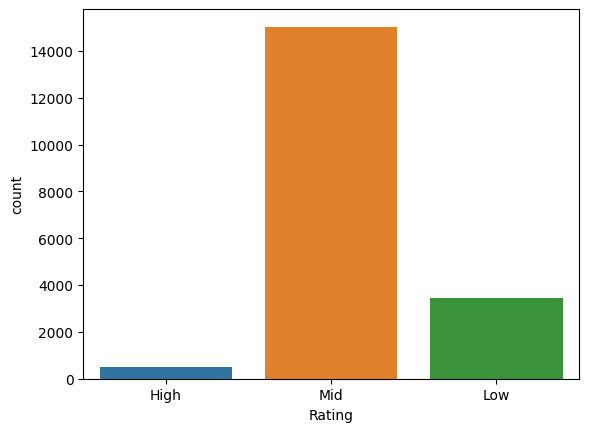

In [17]:
import seaborn as sns   
sns.countplot(x=df['Rating'], data=data)

As seen on the countplot most players are Mid tier level which are 60-79 rated players we can view this better if we use the actual ratings where we see the peak of the graph at the middle where it shows the mid teir ratings

<Axes: xlabel='Rating Level', ylabel='count'>

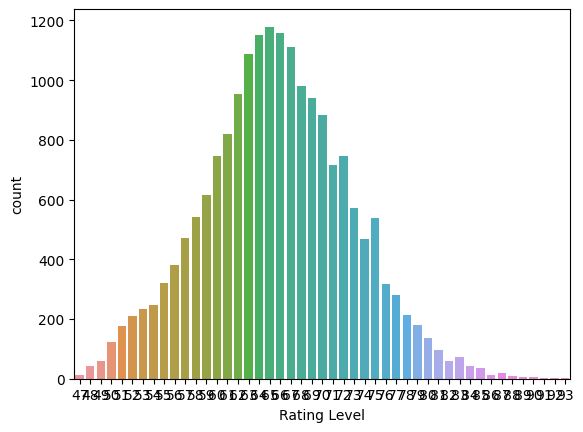

In [18]:
sns.countplot(x=df['Rating Level'], data=data)

We can also view the outliers of our dataset

<Axes: xlabel='Age'>

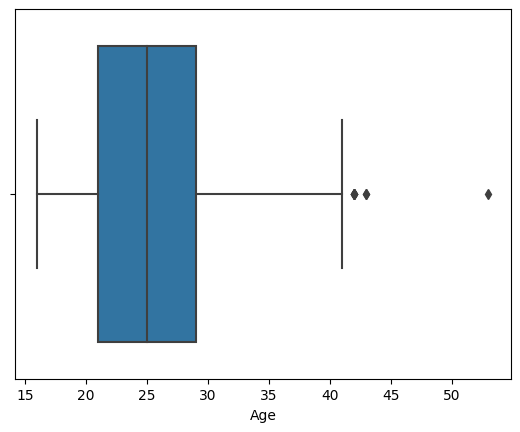

In [19]:
sns.boxplot(x=df['Age'], data=data)

As seen the age as an outlier which is a player above 50 years we can use this by viewing the max

In [20]:
df['Age'].max()

53

The max player age is 53 which shows our outlier

<Axes: xlabel='Rating Level'>

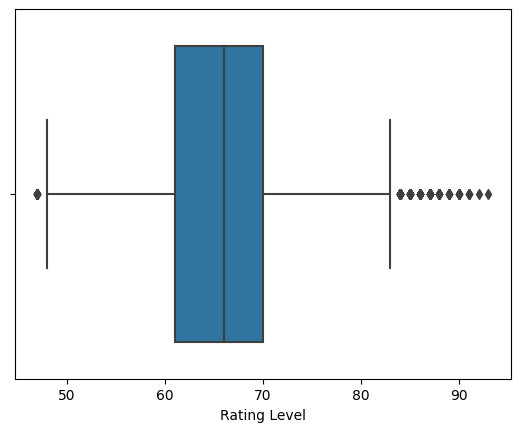

In [21]:
sns.boxplot(x=df['Rating Level'], data=data)

The rating doesnt show a clear outlier

<Axes: xlabel='Wage'>

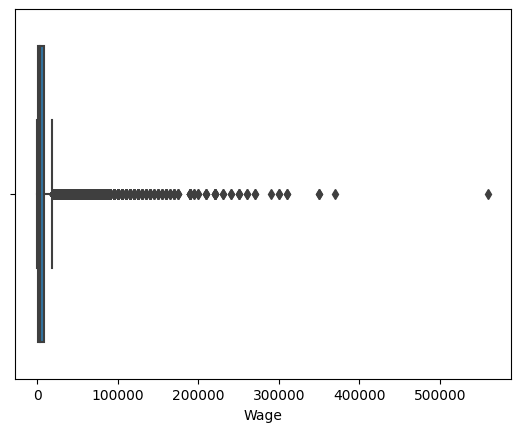

In [22]:
sns.boxplot(x=df['Wage'], data=data)

<Axes: xlabel='Value'>

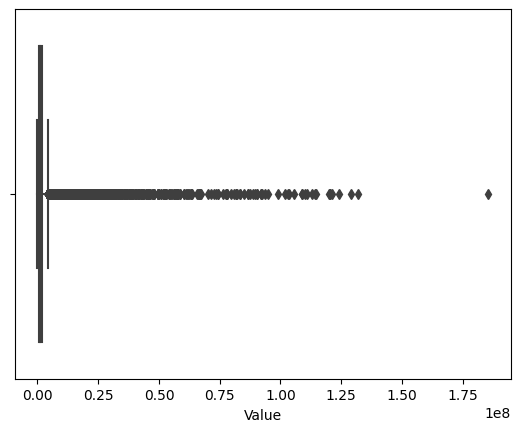

In [23]:
sns.boxplot(x=df['Value'], data=data)

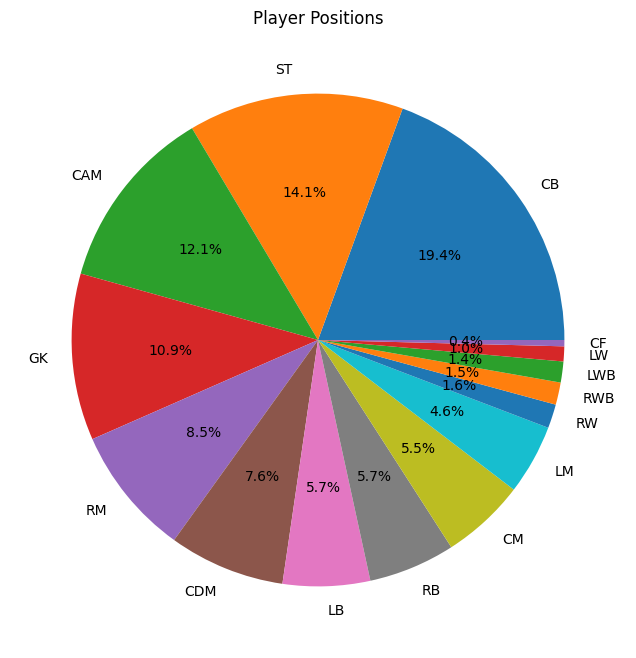

In [24]:
import matplotlib.pyplot as plt

status_counts = df['Position'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%')
plt.title('Player Positions')
plt.show()

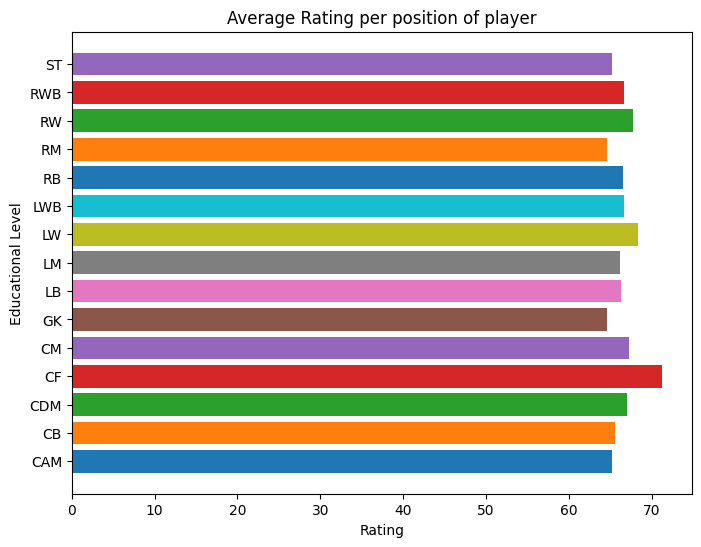

In [25]:
grouped_df = df.groupby('Position')['Rating Level'].mean().reset_index()

plt.figure(figsize=(8,6))
plt.barh(grouped_df['Position'], grouped_df['Rating Level'], color=['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf'])
plt.title('Average Rating per position of player')
plt.xlabel('Rating')
plt.ylabel('Educational Level')
plt.show()

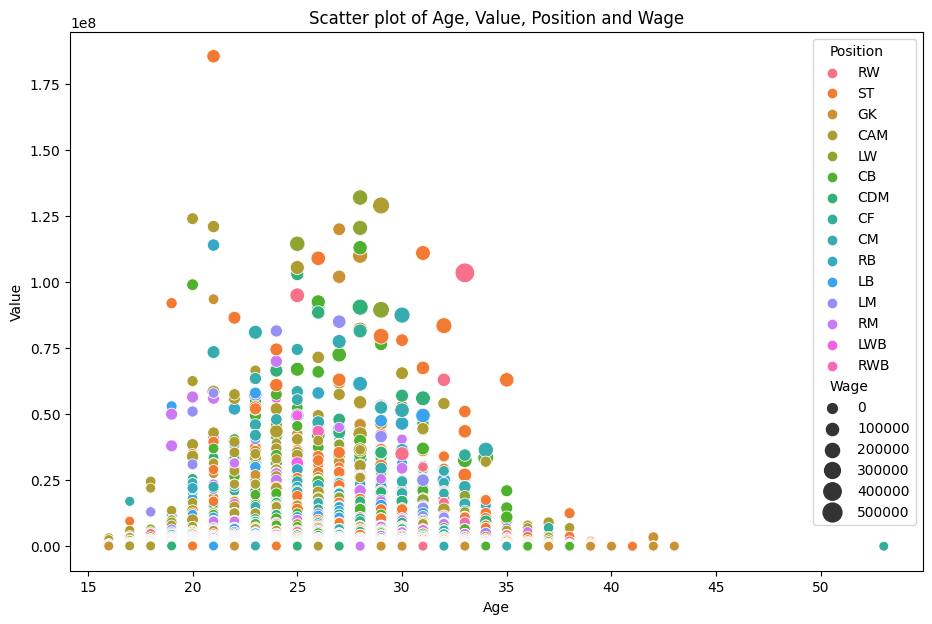

In [26]:
plt.figure(figsize=(11, 7))
sns.scatterplot(data=df, x='Age', y='Value', hue='Position',size='Wage', sizes=(50, 200))
plt.title('Scatter plot of Age, Value, Position and Wage')
plt.xlabel('Age')
plt.ylabel('Value')
plt.show()

Clustering

In [27]:
df_cluster = df[['Nationality', 'Age', 'Club', 'Position', 'Value', 'Wage', 'Rating']]
df_cluster.head()

,Nationality,Age,Club,Position,Value,Wage,Rating
0,Argentina,33,FC Barcelona,RW,103500000,560000,High
1,Portugal,35,Juventus,ST,63000000,220000,High
2,Slovenia,27,Atlético Madrid,GK,120000000,125000,High
3,Belgium,29,Manchester City,CAM,129000000,370000,High
4,Brazil,28,Paris Saint-Germain,LW,132000000,270000,High


In [28]:
df_cluster_LowRating = df_cluster[df_cluster['Rating']=='Low']
df_cluster_MidRating = df_cluster[df_cluster['Rating']=='Mid']
df_cluster_HighRating = df_cluster[df_cluster['Rating']=='High']
df_cluster_HighRating

,Nationality,Age,Club,Position,Value,Wage,Rating
0,Argentina,33,FC Barcelona,RW,103500000,560000,High
1,Portugal,35,Juventus,ST,63000000,220000,High
2,Slovenia,27,Atlético Madrid,GK,120000000,125000,High
3,Belgium,29,Manchester City,CAM,129000000,370000,High
4,Brazil,28,Paris Saint-Germain,LW,132000000,270000,High
...,...,...,...,...,...,...,...
501,Russia,34,PFC CSKA Moscow,GK,3600000,40000,High
502,Portugal,33,Orlando City SC,LW,13000000,13000,High
503,England,34,Liverpool,CDM,9500000,95000,High
504,Spain,38,Real Betis,CAM,7000000,22000,High


In [29]:
X_cluster_LowRating=pd.get_dummies(df_cluster_LowRating)
X_cluster_LowRating.head()

,Age,Value,Wage,Nationality_Albania,Nationality_Algeria,Nationality_Antigua & Barbuda,Nationality_Argentina,Nationality_Australia,Nationality_Austria,Nationality_Azerbaijan,...,Position_LB,Position_LM,Position_LW,Position_LWB,Position_RB,Position_RM,Position_RW,Position_RWB,Position_ST,Rating_Low
15545,27,275000,500,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
15546,19,550000,3000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
15547,24,325000,900,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
15548,28,220000,1000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
15549,18,575000,650,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [30]:
X_cluster_MidRating=pd.get_dummies(df_cluster_MidRating)
X_cluster_MidRating.head()

,Age,Value,Wage,Nationality_Afghanistan,Nationality_Albania,Nationality_Algeria,Nationality_Andorra,Nationality_Angola,Nationality_Antigua & Barbuda,Nationality_Argentina,...,Position_LB,Position_LM,Position_LW,Position_LWB,Position_RB,Position_RM,Position_RW,Position_RWB,Position_ST,Rating_Mid
506,28,0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
507,33,11000000,1000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
508,32,0,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
509,24,0,0,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
510,32,0,0,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True


In [31]:
X_cluster_HighRating=pd.get_dummies(df_cluster_HighRating)
X_cluster_HighRating.head()

,Age,Value,Wage,Nationality_Albania,Nationality_Algeria,Nationality_Argentina,Nationality_Armenia,Nationality_Australia,Nationality_Austria,Nationality_Belgium,...,Position_LB,Position_LM,Position_LW,Position_LWB,Position_RB,Position_RM,Position_RW,Position_RWB,Position_ST,Rating_High
0,33,103500000,560000,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,35,63000000,220000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
2,27,120000000,125000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,29,129000000,370000,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,28,132000000,270000,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


Creating our modules

In [32]:
df['HighRating'] = df['Rating'].apply(lambda x: 'High' if x == 'High' else None)

In [33]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['encoded_rating'] = label_encoder.fit_transform(df['Rating'])
df

,Name,Nationality,Age,Club,Position,Value,Wage,Rating Level,Rating,HighRating,encoded_rating
0,L. Messi,Argentina,33,FC Barcelona,RW,103500000,560000,93,High,High,0
1,Cristiano Ronaldo,Portugal,35,Juventus,ST,63000000,220000,92,High,High,0
2,J. Oblak,Slovenia,27,Atlético Madrid,GK,120000000,125000,91,High,High,0
3,K. De Bruyne,Belgium,29,Manchester City,CAM,129000000,370000,91,High,High,0
4,Neymar Jr,Brazil,28,Paris Saint-Germain,LW,132000000,270000,91,High,High,0
...,...,...,...,...,...,...,...,...,...,...,...
18974,Xia Ao,China PR,21,Wuhan Zall,CB,100000,1000,47,Low,None,1
18975,B. Hough,England,17,Oldham Athletic,CAM,130000,500,47,Low,None,1
18976,R. McKinley,England,18,Derry City,CAM,120000,500,47,Low,None,1
18977,Wang Zhen'ao,China PR,20,Dalian YiFang FC,ST,100000,2000,47,Low,None,1


In [34]:
predictors=df[['Nationality', 'Age', 'Club', 'Position', 'Value', 'Wage']]
target=df["encoded_rating"]
target

0        0
1        0
2        0
3        0
4        0
        ..
18974    1
18975    1
18976    1
18977    1
18978    1
Name: encoded_rating, Length: 18979, dtype: int64

In [35]:
predictors=pd.get_dummies(predictors)
predictors

,Age,Value,Wage,Nationality_Afghanistan,Nationality_Albania,Nationality_Algeria,Nationality_Andorra,Nationality_Angola,Nationality_Antigua & Barbuda,Nationality_Argentina,...,Position_GK,Position_LB,Position_LM,Position_LW,Position_LWB,Position_RB,Position_RM,Position_RW,Position_RWB,Position_ST
0,33,103500000,560000,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,35,63000000,220000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,27,120000000,125000,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,29,129000000,370000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,28,132000000,270000,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,21,100000,1000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18975,17,130000,500,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18976,18,120000,500,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18977,20,100000,2000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


**Decision Tree**

In [36]:
from sklearn.model_selection import train_test_split 

predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3) #split the data where 70% of the data is used for training, and 30% for testing
predictors_train_new, predictors_val, target_train_new, target_val = train_test_split(predictors_train, target_train, test_size=0.1) #The data is split with a 90-10 ratio within the training data. This means 90% of the initial training data is used for the new training set, and 10% is used for the validation set.

In [37]:
from sklearn import tree 
from sklearn import metrics 

max_depth_range = range(1,16)

val_results = []
train_results = []

for i in max_depth_range:
    clf_2 = tree.DecisionTreeClassifier(max_depth=i) 
    clf_2 = clf_2.fit(predictors_train_new, target_train_new)
    pred_train_new = clf_2.predict(predictors_train_new)
    train_score = metrics.accuracy_score(target_train_new, pred_train_new)
    train_results.append(train_score)
    pred_val = clf_2.predict(predictors_val)
    val_score = metrics.accuracy_score(target_val, pred_val)
    val_results.append(val_score)
print(val_results)

[0.8306997742663657, 0.9367945823927766, 0.9390519187358917, 0.9510910458991723, 0.9578630549285176, 0.963130173062453, 0.963882618510158, 0.9563581640331076, 0.9616252821670429, 0.9593679458239278, 0.9608728367193379, 0.9593679458239278, 0.9563581640331076, 0.9616252821670429, 0.9608728367193379]


By observing the plot, you can identify the maximum validation score and its corresponding maximum depth. This information can guide you in selecting the appropriate maximum depth for your decision tree model to avoid overfitting or underfitting.

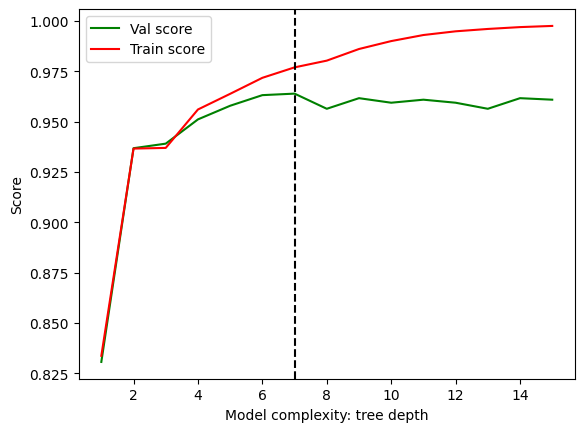

In [38]:
plt.plot(max_depth_range, val_results, 'g-', label='Val score')
plt.plot(max_depth_range, train_results, 'r-', label='Train score')
plt.ylabel('Score')
plt.xlabel('Model complexity: tree depth')
plt.legend()

max_val_index = val_results.index(max(val_results))

plt.axvline(x=max_depth_range[max_val_index], color='k', linestyle='--', label='Max Val score')

plt.show()

The best peforming module has a depth of 10 and a success rate of 96.86%

In [39]:
clf_best1 = tree.DecisionTreeClassifier(max_depth=val_results.index(max(val_results))) 
clf_best1 = clf_best1.fit(predictors_train , target_train) 
y_pred = clf_best1.predict(predictors_test)
print(metrics.accuracy_score(target_test , y_pred))

0.9603090972953987


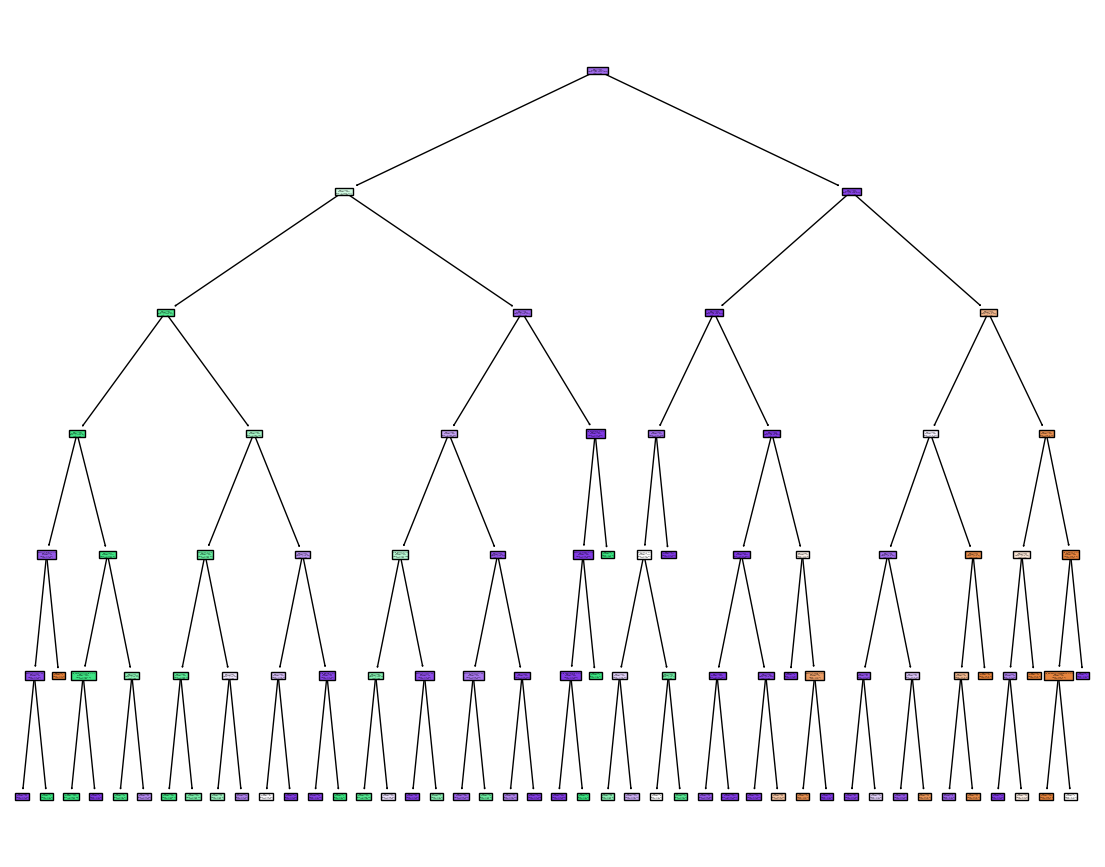

In [40]:
fig = plt.figure(figsize=(14, 11)) #plot the decision tree
_ = tree.plot_tree(clf_best1, feature_names=predictors.columns, class_names=["Low","Mid", "High"],  filled=True)

Logical regression method

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [42]:
X=df[['Nationality', 'Age', 'Club', 'Position', 'Value', 'Wage']]
y=df["encoded_rating"]
X = pd.get_dummies(X)
X.head()

,Age,Value,Wage,Nationality_Afghanistan,Nationality_Albania,Nationality_Algeria,Nationality_Andorra,Nationality_Angola,Nationality_Antigua & Barbuda,Nationality_Argentina,...,Position_GK,Position_LB,Position_LM,Position_LW,Position_LWB,Position_RB,Position_RM,Position_RW,Position_RWB,Position_ST
0,33,103500000,560000,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,35,63000000,220000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,27,120000000,125000,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,29,129000000,370000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,28,132000000,270000,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
#Normalisation of data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
#hyperparameters using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
grid = GridSearchCV(LogisticRegression(), param_grid, verbose=3)
grid.fit(X_train, y_train)
print("Best hyperparameters:\n", grid.best_params_)
print("Best score:", grid.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.1s
[CV 2/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.795 total time=   0.4s
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.796 total time=   0.4s
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.796 total time=   0.4s
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.796 total time=   0.4s
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.796 total time=   0.4s
[CV 1/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.1s
[CV 2/5] END ..................C=0.01, penalty=l

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ...................C=1, penalty=l2;, score=0.870 total time=   3.4s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ...................C=1, penalty=l2;, score=0.869 total time=   3.2s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ...................C=1, penalty=l2;, score=0.875 total time=   2.7s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ...................C=1, penalty=l2;, score=0.875 total time=   2.9s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ...................C=1, penalty=l2;, score=0.878 total time=   2.6s
[CV 1/5] END ....................C=10, penalty=l1;, score=nan total time=   0.1s
[CV 2/5] END ....................C=10, penalty=l1;, score=nan total time=   0.1s
[CV 3/5] END ....................C=10, penalty=l1;, score=nan total time=   0.1s
[CV 4/5] END ....................C=10, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ....................C=10, penalty=l1;, score=nan total time=   0.0s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ..................C=10, penalty=l2;, score=0.877 total time=   2.7s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ..................C=10, penalty=l2;, score=0.879 total time=   2.8s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ..................C=10, penalty=l2;, score=0.881 total time=   2.7s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ..................C=10, penalty=l2;, score=0.881 total time=   2.7s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ..................C=10, penalty=l2;, score=0.889 total time=   2.7s
[CV 1/5] END ...................C=100, penalty=l1;, score=nan total time=   0.1s
[CV 2/5] END ...................C=100, penalty=l1;, score=nan total time=   0.1s
[CV 3/5] END ...................C=100, penalty=l1;, score=nan total time=   0.1s
[CV 4/5] END ...................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ...................C=100, penalty=l1;, score=nan total time=   0.0s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END .................C=100, penalty=l2;, score=0.886 total time=   2.8s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END .................C=100, penalty=l2;, score=0.883 total time=   2.9s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END .................C=100, penalty=l2;, score=0.895 total time=   3.6s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END .................C=100, penalty=l2;, score=0.884 total time=   2.9s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceba

[CV 5/5] END .................C=100, penalty=l2;, score=0.901 total time=   2.7s
Best hyperparameters:
 {'C': 100, 'penalty': 'l2'}
Best score: 0.8898005269100489


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
clf = LogisticRegression(C=grid.best_params_['C'], penalty=grid.best_params_['penalty'])
clf = clf.fit(X_train, y_train)
print("Model parameters:\n", clf.get_params())

Model parameters:
 {'C': 100, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print("Predictions:\n", y_pred[0:3])
print("Actual:\n", y_test[0:3])
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Predictions:
 [2 1 2]
Actual:
 14982    2
17465    1
13133    2
Name: encoded_rating, dtype: int64
Accuracy: 0.8939234281700035


In [47]:
df3 = pd.DataFrame(zip(X.columns , np.transpose(
clf.coef_.tolist()[0])), columns=['features','coefficient']) # create a dataframe 
df3

,features,coefficient
0,Age,14.424852
1,Value,88.790362
2,Wage,49.875085
3,Nationality_Afghanistan,-0.018318
4,Nationality_Albania,0.444580
...,...,...
859,Position_RB,-0.267815
860,Position_RM,-2.518016
861,Position_RW,0.356427
862,Position_RWB,-2.765422
